1. Data Preprocessing:
 Load the provided dataset and perform initial data exploration.


 Handle missing data and outliers.


 Prepare the data for machine learning by encoding categorical variables and splitting it into training and testing sets

In [83]:
import pandas as pd
import numpy as np
data = pd.read_excel(r"/content/customer_churn_large_dataset.xlsx")
data.head()


CustomerID        Name  Age  Gender     Location  \
0           1  Customer_1   63    Male  Los Angeles   
1           2  Customer_2   62  Female     New York   
2           3  Customer_3   24  Female  Los Angeles   
3           4  Customer_4   36  Female        Miami   
4           5  Customer_5   46  Female        Miami   

   Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  
0                          17         73.36             236      0  
1                           1         48.76             172      0  
2                           5         85.47             460      0  
3                           3         97.94             297      1  
4                          19         58.14             266      0

In [84]:
df = data.copy()

In [85]:
df.tail()

CustomerID             Name  Age  Gender     Location  \
99995       99996   Customer_99996   33    Male      Houston   
99996       99997   Customer_99997   62  Female     New York   
99997       99998   Customer_99998   64    Male      Chicago   
99998       99999   Customer_99999   51  Female     New York   
99999      100000  Customer_100000   27  Female  Los Angeles   

       Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  
99995                          23         55.13             226      1  
99996                          19         61.65             351      0  
99997                          17         96.11             251      1  
99998                          20         49.25             434      1  
99999                          19         76.57             173      1

In [86]:
# Get summary statistics
print(df.describe())

          CustomerID            Age  Subscription_Length_Months  \
count  100000.000000  100000.000000               100000.000000   
mean    50000.500000      44.027020                   12.490100   
std     28867.657797      15.280283                    6.926461   
min         1.000000      18.000000                    1.000000   
25%     25000.750000      31.000000                    6.000000   
50%     50000.500000      44.000000                   12.000000   
75%     75000.250000      57.000000                   19.000000   
max    100000.000000      70.000000                   24.000000   

        Monthly_Bill  Total_Usage_GB          Churn  
count  100000.000000   100000.000000  100000.000000  
mean       65.053197      274.393650       0.497790  
std        20.230696      130.463063       0.499998  
min        30.000000       50.000000       0.000000  
25%        47.540000      161.000000       0.000000  
50%        65.010000      274.000000       0.000000  
75%        82.6400

In [87]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [88]:
df.describe()

CustomerID            Age  Subscription_Length_Months  \
count  100000.000000  100000.000000               100000.000000   
mean    50000.500000      44.027020                   12.490100   
std     28867.657797      15.280283                    6.926461   
min         1.000000      18.000000                    1.000000   
25%     25000.750000      31.000000                    6.000000   
50%     50000.500000      44.000000                   12.000000   
75%     75000.250000      57.000000                   19.000000   
max    100000.000000      70.000000                   24.000000   

        Monthly_Bill  Total_Usage_GB          Churn  
count  100000.000000   100000.000000  100000.000000  
mean       65.053197      274.393650       0.497790  
std        20.230696      130.463063       0.499998  
min        30.000000       50.000000       0.000000  
25%        47.540000      161.000000       0.000000  
50%        65.010000      274.000000       0.000000  
75%        82.640000      387.000000       1.000000  
max       100.000000      500.000000       1.000000

In [89]:
# Example of using z-score to detect and remove outliers
from scipy.stats import zscore
z_scores = zscore(df.select_dtypes(include=['int', 'float']))
abs_z_scores = abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)
df = df[~outliers]

###Outlier Check

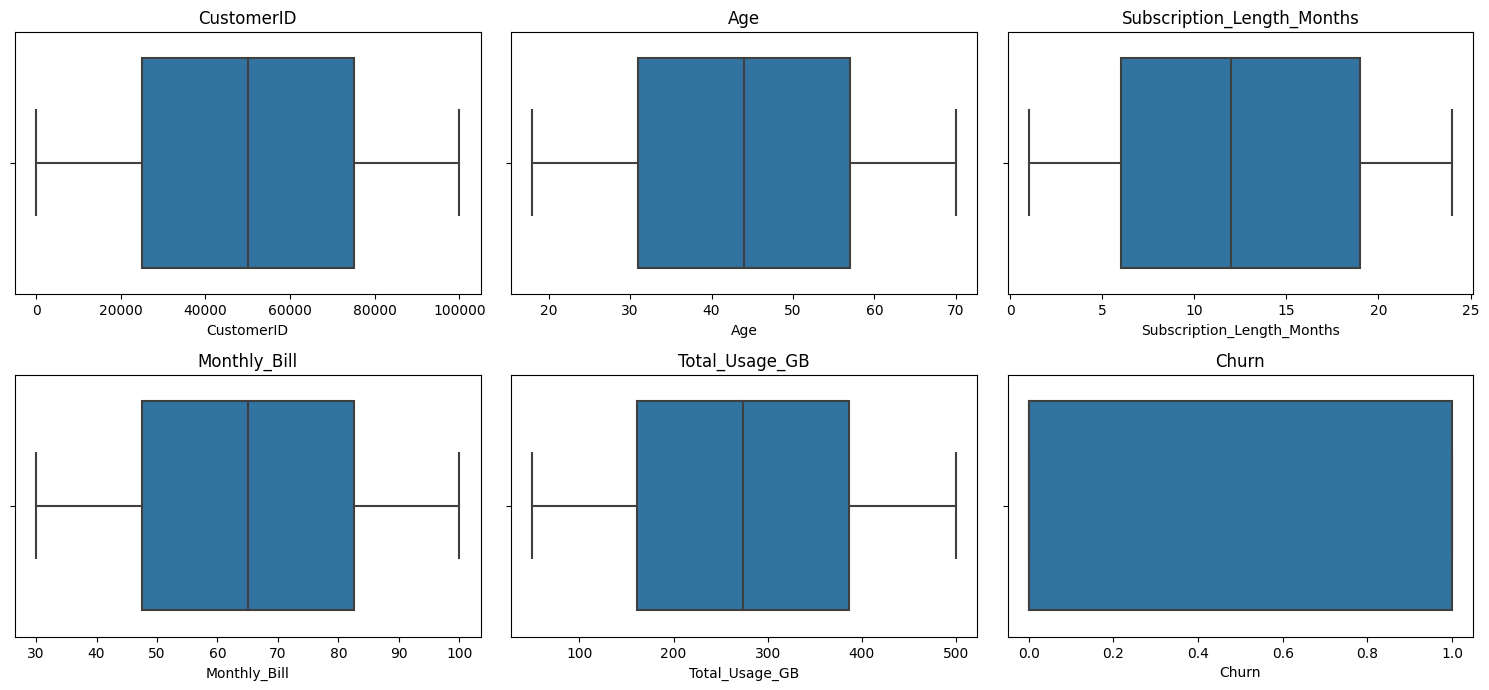

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your preprocessed DataFrame

# Select numerical columns for plotting
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Create subplots for each numerical feature
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns, start=1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


### Encoded CAtegorical Varieable

In [91]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Location'] = label_encoder.fit_transform(df['Location'])

In [92]:
df.head()

CustomerID        Name  Age  Gender  Location  Subscription_Length_Months  \
0           1  Customer_1   63       1         2                          17   
1           2  Customer_2   62       0         4                           1   
2           3  Customer_3   24       0         2                           5   
3           4  Customer_4   36       0         3                           3   
4           5  Customer_5   46       0         3                          19   

   Monthly_Bill  Total_Usage_GB  Churn  
0         73.36             236      0  
1         48.76             172      0  
2         85.47             460      0  
3         97.94             297      1  
4         58.14             266      0

Prepare Data For machine learning

In [94]:

X = df.drop('Churn', axis=1)
y = df['Churn']

In [95]:

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. Feature Engineering:
 Generate relevant features from the dataset that can help improve the model's prediction accuracy.


 Apply feature scaling or normalization if necessary

In [96]:
df['Total_Bill'] = df['Subscription_Length_Months'] * df['Monthly_Bill']


In [97]:
df['Total_Bill'] = df['Subscription_Length_Months'] * df['Monthly_Bill']

# Print the resulting DataFrame
print(data)


       CustomerID             Name  Age  Gender     Location  \
0               1       Customer_1   63    Male  Los Angeles   
1               2       Customer_2   62  Female     New York   
2               3       Customer_3   24  Female  Los Angeles   
3               4       Customer_4   36  Female        Miami   
4               5       Customer_5   46  Female        Miami   
...           ...              ...  ...     ...          ...   
99995       99996   Customer_99996   33    Male      Houston   
99996       99997   Customer_99997   62  Female     New York   
99997       99998   Customer_99998   64    Male      Chicago   
99998       99999   Customer_99999   51  Female     New York   
99999      100000  Customer_100000   27  Female  Los Angeles   

       Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  
0                              17         73.36             236      0  
1                               1         48.76             172      0  
2           

Binning or Bucketing:

In [98]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 20, 40, 60, 80, 100], labels=['<20', '20-40', '40-60', '60-80', '80+'])


Time-Based Features:

Extract components like year, month, day from date variables

In [99]:
df['Total_Months_Age'] = df['Age'] * df['Subscription_Length_Months']
print(df.columns)

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Churn',
       'Total_Bill', 'Age_Group', 'Total_Months_Age'],
      dtype='object')


One-Hot Encoding:

Convert categorical variables into a binary matrix.

In [100]:
df = pd.get_dummies(df, columns=['Location'])


Feature Scaling:

Scale features to have similar ranges to prevent certain features from dominating the learning process

In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']] = scaler.fit_transform(df[['Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']])


Polynomial Features:

Generate polynomial combinations of features.

In [103]:
numeric_features = X.select_dtypes(include=['int', 'float'])
categorical_features = X.select_dtypes(include=['object'])


In [104]:
##Handle Categorical Features:

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
categorical_features_encoded = encoder.fit_transform(categorical_features)


Combine Numeric and Encoded Categorical Features:

Once you have encoded the categorical features, you can combine them with the numeric features:

In [105]:
df.head()

CustomerID        Name  Age  Gender  Subscription_Length_Months  \
0           1  Customer_1   63       1                    0.651115   
1           2  Customer_2   62       0                   -1.658879   
2           3  Customer_3   24       0                   -1.081380   
3           4  Customer_4   36       0                   -1.370129   
4           5  Customer_5   46       0                    0.939864   

   Monthly_Bill  Total_Usage_GB  Churn  Total_Bill Age_Group  \
0      0.410606       -0.294289      0     1247.12     60-80   
1     -0.805374       -0.784852      0       48.76     60-80   
2      1.009204        1.422681      0      427.35     20-40   
3      1.625597        0.173279      1      293.82     20-40   
4     -0.341720       -0.064338      0     1104.66     40-60   

   Total_Months_Age  Location_0  Location_1  Location_2  Location_3  \
0              1071           0           0           1           0   
1                62           0           0           0           0   
2               120           0           0           1           0   
3               108           0           0           0           1   
4               874           0           0           0           1   

   Location_4  
0           0  
1           1  
2           0  
3           0  
4           0

In [106]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)


In [107]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X['Name'] = label_encoder.fit_transform(X['Name'])


Feature Selection:

Use techniques like Recursive Feature Elimination (RFE) or feature importance from models.

In [108]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Assuming 'X' is your feature matrix and 'y' is your target variable

model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=5)
X_rfe = rfe.fit_transform(X, y)


In [109]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is your DataFrame and you want to scale all numeric columns
scaler = MinMaxScaler()

# Apply min-max scaling to all numeric columns
df[df.select_dtypes(include=['int', 'float']).columns] = scaler.fit_transform(df.select_dtypes(include=['int', 'float']))


In [110]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Assuming 'X' is your feature matrix and 'y' is your target variable
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=5)
X_rfe = rfe.fit_transform(X, y)

# Get the mask of selected features
selected_features_mask = rfe.support_

# Get the names of the selected features
selected_features = X.columns[selected_features_mask]

# Print the names of the selected features
print(selected_features)



Index(['Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Total_Usage_GB'],
      dtype='object')


Model Training

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'X' is your feature matrix and 'y' is your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression().fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}')


Accuracy: 0.5049, Precision: 0.5050, Recall: 0.0917, F1-score: 0.1553


Neural Network

In [112]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature matrix and 'y' is your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the neural network model
model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Add second hidden layer
model.add(Dense(units=32, activation='relu'))

# Add output layer
model.add(Dense(units=1, activation='sigmoid'))  # Assuming binary classification (churn or not churn)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy:.4f}')



Epoch 1/10
2500/2500 [==============================] - 7s 2ms/step - loss: 57.9016 - accuracy: 0.4984 - val_loss: 48.6717 - val_accuracy: 0.4956
Epoch 2/10
2500/2500 [==============================] - 7s 3ms/step - loss: 40.8736 - accuracy: 0.5003 - val_loss: 5.4957 - val_accuracy: 0.4963
Epoch 3/10
2500/2500 [==============================] - 6s 2ms/step - loss: 26.3471 - accuracy: 0.5013 - val_loss: 10.1614 - val_accuracy: 0.5044
Epoch 4/10
2500/2500 [==============================] - 7s 3ms/step - loss: 17.5662 - accuracy: 0.5001 - val_loss: 23.4129 - val_accuracy: 0.4963
Epoch 5/10
2500/2500 [==============================] - 6s 2ms/step - loss: 10.6696 - accuracy: 0.5019 - val_loss: 4.0570 - val_accuracy: 0.4961
Epoch 6/10
2500/2500 [==============================] - 7s 3ms/step - loss: 6.8406 - accuracy: 0.4974 - val_loss: 13.3724 - val_accuracy: 0.4969
Epoch 7/10
2500/2500 [==============================] - 6s 2ms/step - loss: 4.9156 - accuracy: 0.4983 - val_loss: 6.7415 - val_

DecisionTreeClassifier

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'X' is your feature matrix and 'y' is your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')



Accuracy: 0.4924
Precision: 0.4884
Recall: 0.4886
F1-score: 0.4885


In [114]:
# Save to Excel
df.to_excel('/content/customer_churn_large_dataset.xlsx', index=False)

Randome ForestClasifier

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.4972
Precision: 0.4926924326079896
Recall: 0.45872391895978226
F1 Score: 0.47510178515502666


Index(['Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Total_Usage_GB'],
      dtype='object')

In [120]:
df.head()

CustomerID        Name       Age  Gender  Subscription_Length_Months  \
0     0.00000  Customer_1  0.865385     1.0                    0.695652   
1     0.00001  Customer_2  0.846154     0.0                    0.000000   
2     0.00002  Customer_3  0.115385     0.0                    0.173913   
3     0.00003  Customer_4  0.346154     0.0                    0.086957   
4     0.00004  Customer_5  0.538462     0.0                    0.782609   

   Monthly_Bill  Total_Usage_GB  Churn  Total_Bill Age_Group  \
0      0.619429        0.413333    0.0    0.513644     60-80   
1      0.268000        0.271111    0.0    0.007892     60-80   
2      0.792429        0.911111    0.0    0.167671     20-40   
3      0.970571        0.548889    1.0    0.111317     20-40   
4      0.402000        0.480000    0.0    0.453521     40-60   

   Total_Months_Age  Location_0  Location_1  Location_2  Location_3  \
0          0.633574           0           0           1           0   
1          0.026474           0           0           0           0   
2          0.061372           0           0           1           0   
3          0.054152           0           0           0           1   
4          0.515042           0           0           0           1   

   Location_4  
0           0  
1           1  
2           0  
3           0  
4           0

In [133]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assuming 'X' is your feature matrix and 'y' is your target variable
X = df[['Age', 'Gender', 'Location_0', 'Subscription_Length_Months', 'Total_Usage_GB']]
y = df['Churn']

# Create and train a Random Forest Classifier (assuming 'model' is your trained model)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Now, you can use this trained model to make predictions on new data
new_data = pd.DataFrame({
    'Age': [50],  # Replace with actual values
    'Gender': ['0'],  # Replace with actual values
    'Location_0': ['1'],  # Replace with actual values
    'Subscription_Length_Months': [12],  # Replace with actual values
    'Total_Usage_GB': [50]  # Replace with actual values
})

# Use the trained Random Forest Classifier to make predictions
predictions = model.predict(new_data)

# Print the predicted churn value(s)
print(predictions)


[1.]


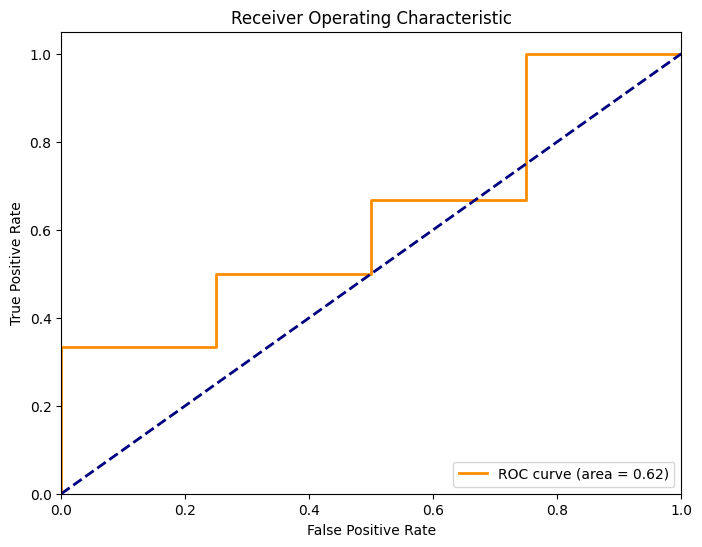

In [135]:
# Assuming you have true labels (y_true) and predicted probabilities (y_prob)

# Step 1: Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Step 2: Generate some sample data (replace with your actual data)
# y_true contains true labels (0 or 1) and y_prob contains predicted probabilities
y_true = [0, 1, 1, 0, 1, 0, 1, 0, 1, 1]
y_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]

# Step 3: Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# Step 4: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


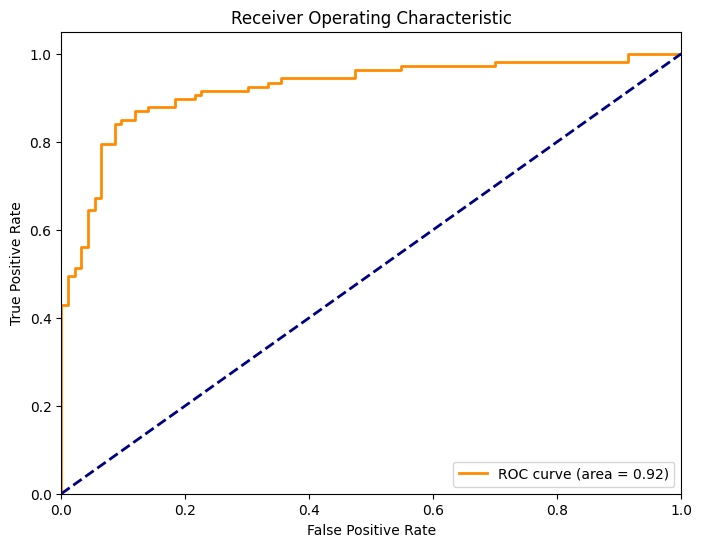

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Step 1: Generate synthetic data (you can replace this with your own dataset)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a classification model (Logistic Regression as an example)
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Predict probabilities on the test set
y_prob = model.predict_proba(X_test)[:, 1]

# Step 5: Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Step 6: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


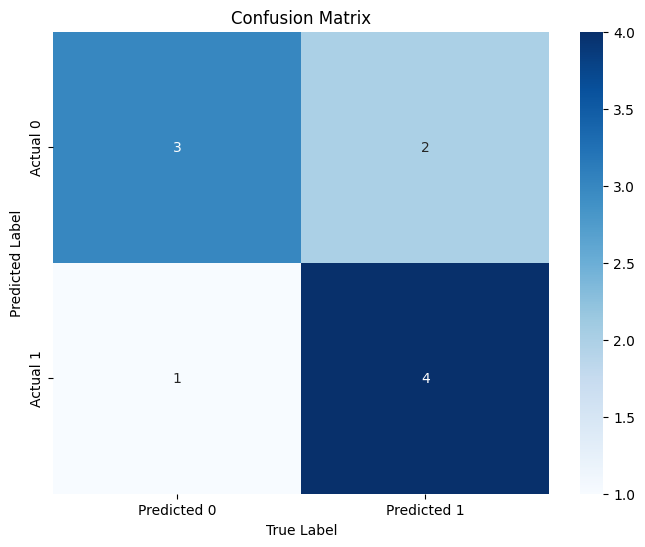

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have y_true (true labels) and y_pred (predicted labels)
# Replace y_true and y_pred with your actual data

y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]  # Example true labels
y_pred = [1, 1, 1, 1, 0, 1, 0, 1, 0, 0]  # Example predicted labels

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()
